# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import imblearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest



from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline

In [2]:
#pip install kaleido

# Database loading

In [3]:
url = 'https://raw.githubusercontent.com/tomeichiara/CardiotocographyDataSet/main/Cardio.csv'
cardio_df = pd.read_csv(url)

In [4]:
# ADATTAMENTO AL PROBLEMA BINARIO 
cardio_df.NSP.replace(3,2,inplace=True) #inplace serve per rendere effettiva la modifica anche su cardio_df
cardio_df = cardio_df.rename(columns={"NSP": "TARGET"})
cardio_df = cardio_df.drop('CLASS',1)
cardio_df = cardio_df.drop('Tendency',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [5]:
class_distribution = cardio_df.TARGET.value_counts()
class_distribution

1    1655
2     471
Name: TARGET, dtype: int64

In [6]:
cardio_df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,TARGET
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,...,40,137,177,4,0,153,150,152,2,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,...,66,103,169,6,0,152,148,151,3,2
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,...,67,103,170,5,0,153,148,152,4,2
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,...,66,103,169,6,0,152,147,151,4,2


# Missing Values

In [7]:
#MISSING VALUES
print(cardio_df.isnull().sum())
cardio_df.isna().sum()
print(cardio_df.info())


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
TARGET      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 

In [8]:
# Duplicates
duplicati = cardio_df.duplicated()
np.count_nonzero(duplicati)

12

# Class Distribution

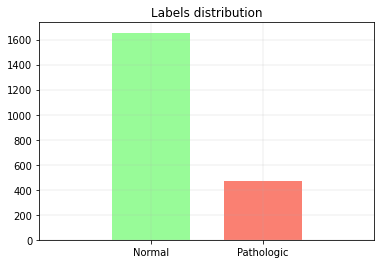

In [9]:
#HISTOGRAM LABEL DISTRIBUTION
width = 0.07
x=["Normal","Pathologic"]
x_pos=[0.1,0.2]
y=[class_distribution[1],class_distribution[2]]

plt.bar(x_pos, height=y, color=["palegreen", "salmon"], width=0.07, tick_label=x)
plt.xlim(0,0.3)
plt.title("Labels distribution")
plt.xticks([0.1,0.2], x)
plt.grid(b=None, which='major', axis='both', linestyle='-', linewidth=0.2)

plt.show()

In [10]:
print(cardio_df.groupby('TARGET').count())

          LB    AC    FM    UC    DL    DS    DP  ASTV  MSTV  ALTV  MLTV  \
TARGET                                                                     
1       1655  1655  1655  1655  1655  1655  1655  1655  1655  1655  1655   
2        471   471   471   471   471   471   471   471   471   471   471   

        Width   Min   Max  Nmax  Nzeros  Mode  Mean  Median  Variance  
TARGET                                                                 
1        1655  1655  1655  1655    1655  1655  1655    1655      1655  
2         471   471   471   471     471   471   471     471       471  


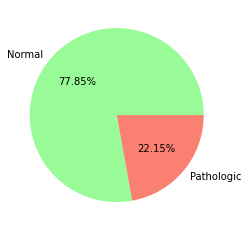

In [11]:
#PIE CHART
cardio_numpy=cardio_df.to_numpy()
labels= 'Normal', 'Pathologic'
colors = ["palegreen", "salmon"]
plt.pie([class_distribution[1],class_distribution[2]], labels=labels, colors=colors, autopct='%1.2f%%', wedgeprops={'linewidth':5},)
plt.show()

# Statistics

In [12]:
#STATISTICS ABOUT ATTRIBUTES
cardio_df_without_target = cardio_df.drop(columns=['TARGET'])
statistics = cardio_df_without_target.describe()
transpStat = statistics.transpose()
transpStat = transpStat.drop(['count'], axis =1)

In [13]:
skew = cardio_df_without_target.skew()
kurt = cardio_df_without_target.kurt()
transpStat['skewness'] = skew
transpStat['kurtosis'] = kurt


In [14]:
transpStat

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
LB,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000,0.020312,-0.292943
AC,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284,1.210085,0.784374
FM,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634,7.812157,64.266963
UC,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925,0.156377,-0.649461
DL,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385,1.721570,2.506369
DS,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353,17.811702,321.084735
DP,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348,4.278801,20.077857
ASTV,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000,-0.011829,-1.051030
MSTV,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000,1.657339,4.700756
ALTV,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000,2.195075,4.252998


# BoxPlot

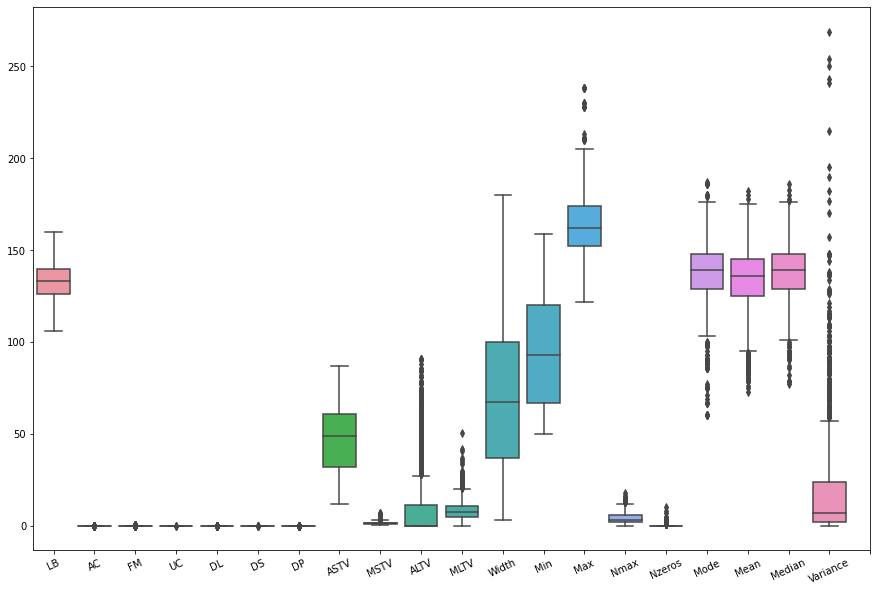

In [15]:
#BOXPLOT (not normalized)

x_ticks_labels=['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance']
plt.figure()

cardiosc=np.array(cardio_df_without_target)
mean_labels=[]

fig=plt.figure(1, figsize=(20,15))
fig.set_size_inches(15, 10)
ax=fig.add_subplot(111)
sns.boxplot(data=cardiosc[:,:], orient='v')
plt.xticks(np.arange(0,21), labels=x_ticks_labels, rotation=25, fontsize=10)  
plt.yticks(fontsize=10)

plt.show()


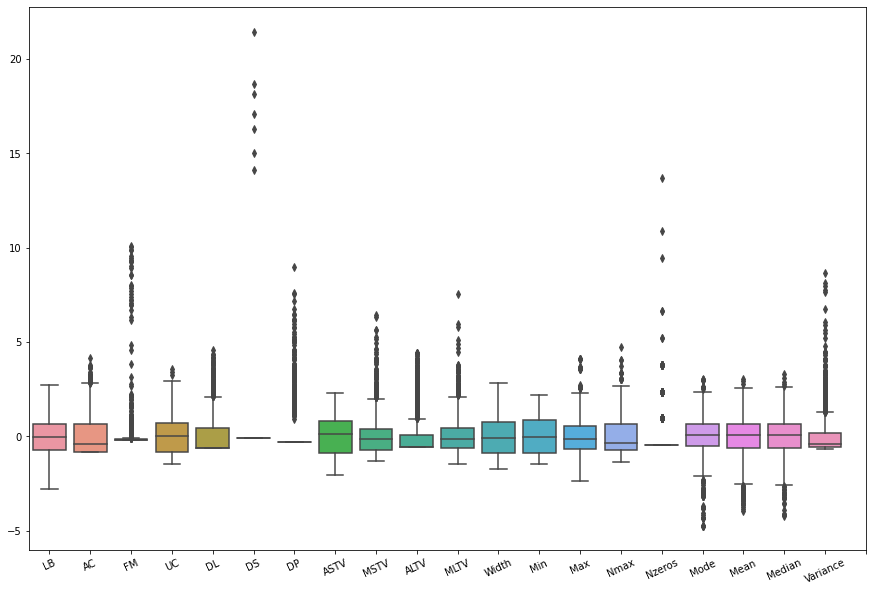

In [16]:
#BOXPLOT (normalized)

x_ticks_labels=['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance']
plt.figure()

scaler = StandardScaler()
cardiosc=scaler.fit_transform(cardio_df_without_target)
mean_labels=[]

fig=plt.figure(1, figsize=(20,15))
fig.set_size_inches(15, 10)
ax=fig.add_subplot(111)
sns.boxplot(data=cardiosc[:,:], orient='v')
plt.xticks(np.arange(0,21), labels=x_ticks_labels, rotation=25, fontsize=10)  
plt.yticks(fontsize=10)

plt.show()


# Outliers

In [17]:
cardio_df_out = cardio_df.copy()
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.05), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(cardio_df_out)
pred = clf.predict(cardio_df_out)
cardio_df_out['anomaly']=pred
outliers=cardio_df_out.loc[cardio_df_out['anomaly']==-1]
outlier_index=list(outliers.index)

print(cardio_df_out['anomaly'].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


 1    2019
-1     107
Name: anomaly, dtype: int64


<Figure size 432x288 with 0 Axes>

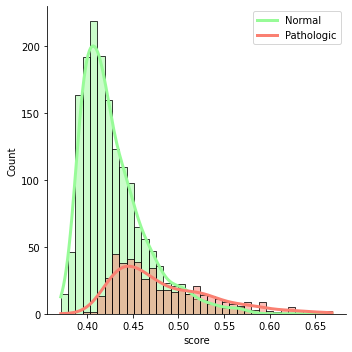

In [18]:
scores = clf.score_samples(cardio_df)
scores = scores*-1
cardio_df_s = cardio_df.copy()
cardio_df_s['score'] = scores

palette = ["salmon","palegreen"]
f = plt.figure()
#sns.displot(cardio_df_s, x='score', hue="TARGET", kind="kde", fill=True, palette=palette, alpha=0.7, hue_order=[2,1], legend = False)
sns.displot(data=cardio_df_s, x="score", hue = "TARGET", kde=True, palette = palette,
            line_kws={'lw': 3}, hue_order=[2,1], legend = False)
#sns.kdeplot(data=cardio_df_s, x='score',multiple="stack", hue="TARGET", palette=palette, alpha = 0.4)
plt.legend(labels=['Normal','Pathologic'])
plt.show()

In [19]:
print(cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'])

TARGET  anomaly
1       -1           27
         1         1628
2       -1           80
         1          391
Name: LB, dtype: int64


In [20]:
outNorm = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[0]
inNorm = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[1]
outPat = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[2]
inPat = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[3]
percNorm = outNorm/inNorm*100
percPat = outPat/inPat*100
print("Percentage of outliers in the normal class: ",'{0:.3}'.format(percNorm),"%")
print("Percentage of outliers in the pathologic class: ",'{0:.3}'.format(percPat),"%")

Percentage of outliers in the normal class:  1.66 %
Percentage of outliers in the pathologic class:  20.5 %


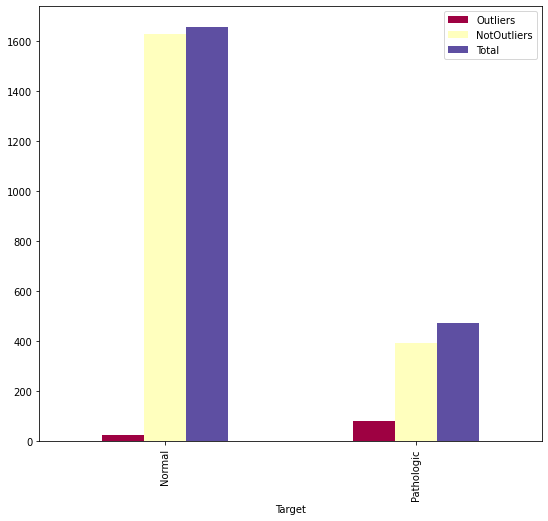

In [21]:
data=[["Normal",outNorm,inNorm,outNorm+inNorm],
      ["Pathologic",outPat,inPat,outPat+inPat]]

df=pd.DataFrame(data,columns=["Target","Outliers","NotOutliers","Total"])
df.plot(x="Target", y=["Outliers","NotOutliers","Total"], kind="bar",figsize=(9,8), colormap="Spectral")
plt.show()

# Feature distribution

In [22]:
#SPLIT INTO DIFFERENT DATAFRAME ACCORDING TO CLASS
distribution_plot_H = True
distribution_plot_K = False
datasets= {}
cardio_by_class = cardio_df.groupby("TARGET")
cardio_by_class

for groups, data in cardio_by_class: #qui groups sono 1 e 2.
    datasets[groups] = data #creo un dizionario dove per la classe 1 ho il df dei normali e per la classe 2 quello dei patologici

normal_numpy = datasets[1].to_numpy()
pathologic_numpy = datasets[2].to_numpy()

In [23]:
cardio_numpy[:,0]

array([120., 132., 133., ..., 140., 140., 142.])

In [24]:
features_name = cardio_df.columns.values
features_name

array(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'TARGET'], dtype=object)

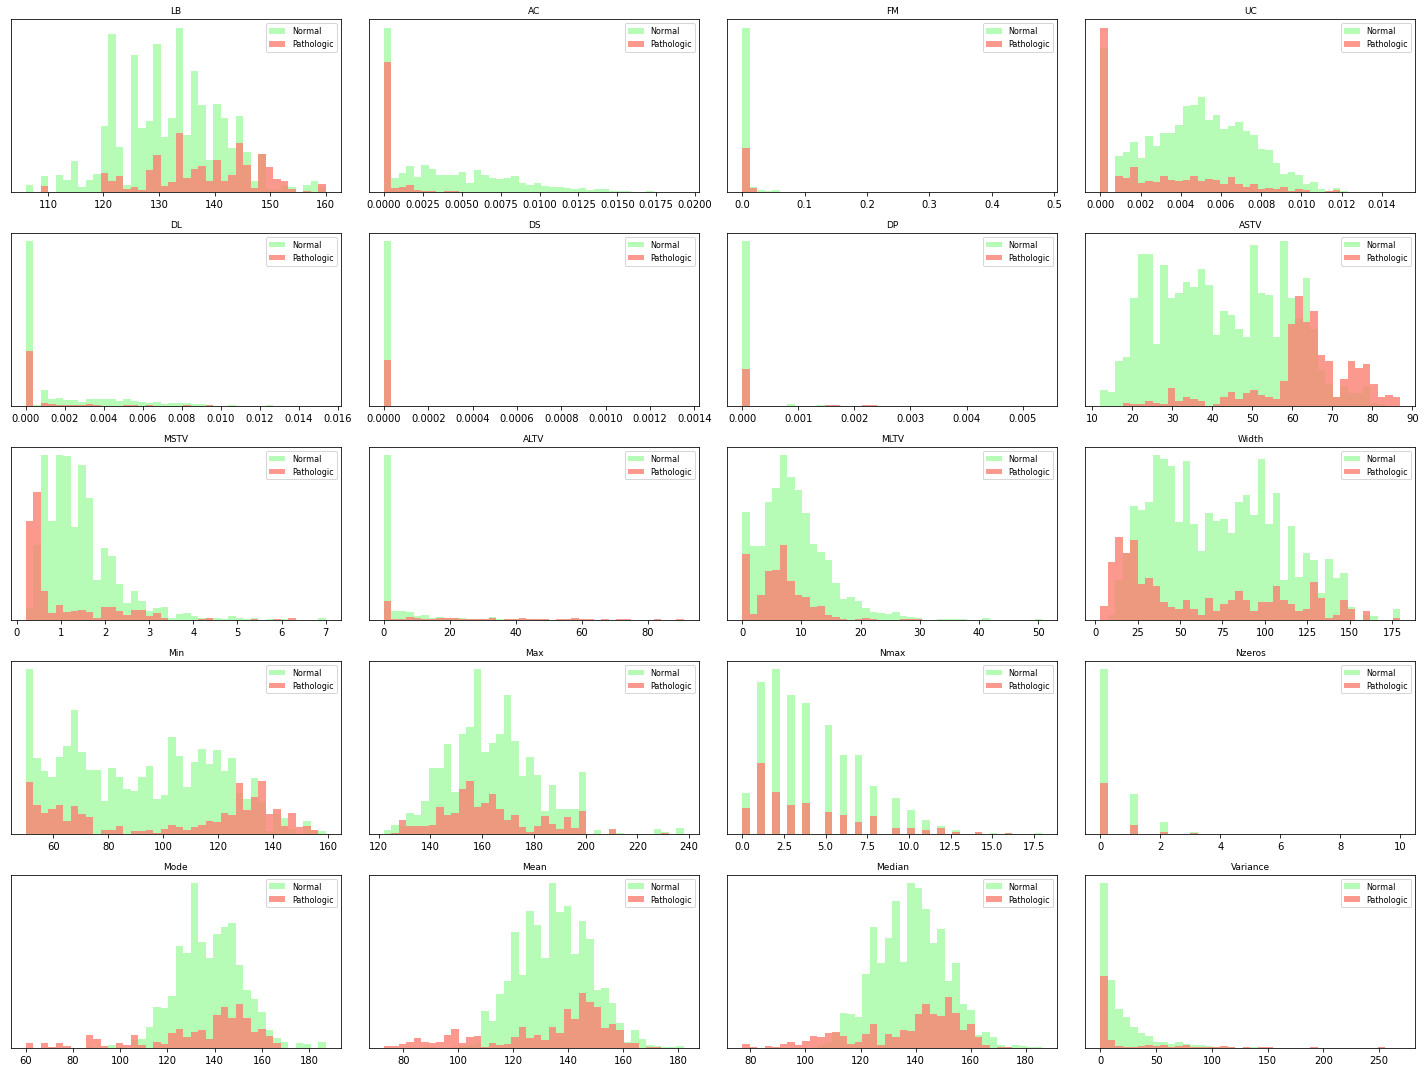

In [27]:
#FEATURES DISTRIBUTION - HISTOGRAMS
if distribution_plot_H == True:
  fig, axes= plt.subplots(5,4, figsize=(20,15))
  ax = axes.ravel()
  features_name = cardio_df.columns.values

  for i in range(20):
    _,bins=np.histogram(cardio_numpy[:,i],bins=40)
    ax[i].hist(normal_numpy[:,i],bins=bins,color='palegreen',alpha=0.7)
    ax[i].hist(pathologic_numpy[:,i],bins=bins,color='salmon',alpha=0.8)
    ax[i].set_title(features_name[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(True)
    ax[i].set_yticks(())
    ax[i].legend(['Normal', 'Pathologic'],loc='best',fontsize=8)
  
  plt.tight_layout()
  plt.show()

#FEATURES DISTRIBUTION - KDE
if distribution_plot_K == True:
  palette = ["salmon","palegreen"]
  f = plt.figure()
  for i in range(20):
    #sns.set(rc={'figure.figsize':(40,40)})
    sns.displot(cardio_df, x=cardio_df.columns.values[i], hue="TARGET", 
                kind="kde", fill=True, palette=palette, legend = False, alpha = 0.8, hue_order=[2,1],height=8.27, aspect=11.7/8.27)

    plt.legend(labels=['Normal','Pathologic'])
    plt.show()

# Correlation matrix

In [28]:
sns.set(style="white", font_scale=1)
cardio_df_clean_for_corr = cardio_df_without_target.drop(columns=['Nzeros','Nmax'])
corr=cardio_df_clean_for_corr.corr(method='pearson')
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Mode,Mean,Median,Variance
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,0.708993,0.723121,0.789246,-0.133938
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,-0.144876,0.298922,-0.154934,0.393712,0.243845,0.270496,0.272948,0.126380
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,0.011062,0.162657,-0.153883,0.099619,-0.061042,-0.089502,-0.072175,0.179309
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,-0.068487,0.140247,-0.111860,0.120195,-0.106559,-0.190340,-0.142111,0.238755
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,-0.243174,0.520282,-0.553921,0.217002,-0.350232,-0.530564,-0.390822,0.567483
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,-0.041751,0.044434,-0.071670,-0.021600,-0.216356,-0.162154,-0.165038,0.132999
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,-0.226737,0.266457,-0.278293,0.120019,-0.437137,-0.492250,-0.448311,0.505023
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,0.058363,0.074554,0.119960,-0.146434
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,-0.307586,-0.445401,-0.336109,0.555852
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,0.165211,0.222321,0.186480,-0.281536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


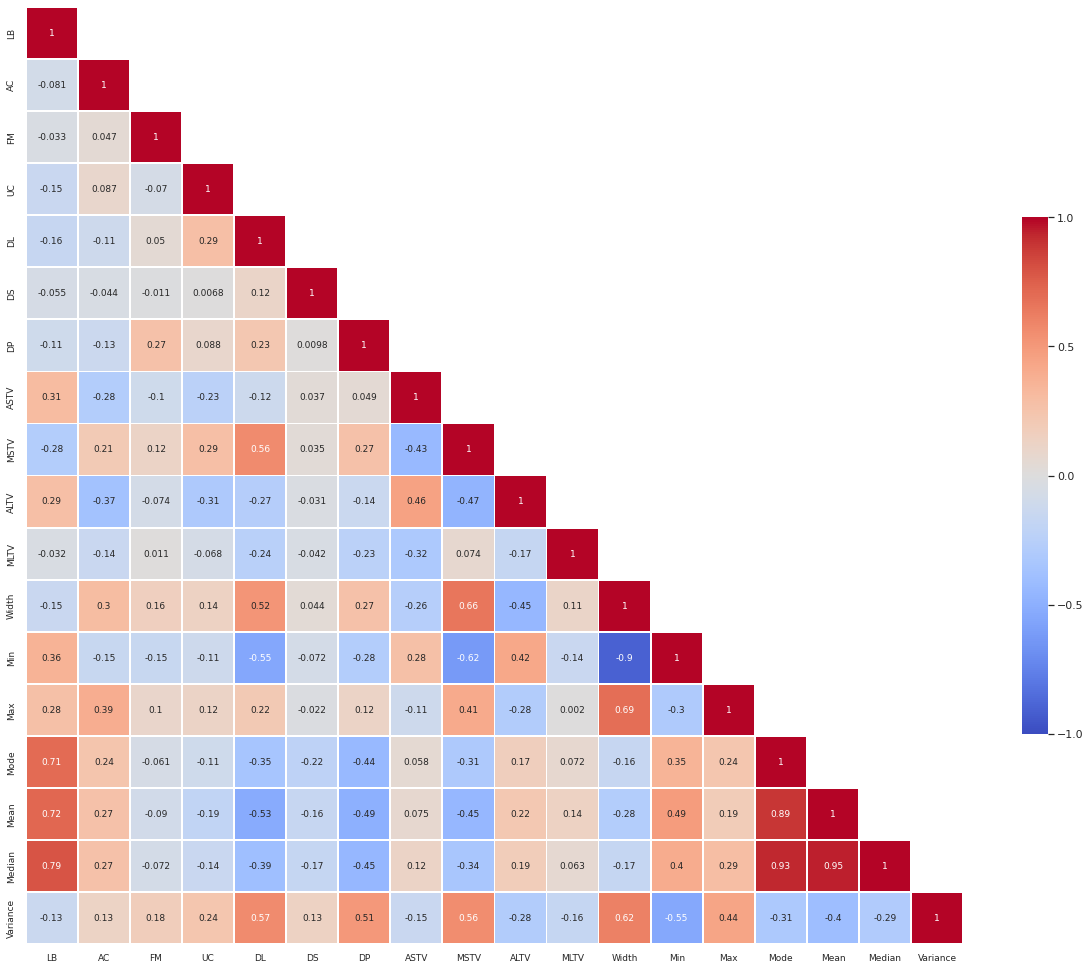

In [29]:
#Plot heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool),+1)
f, ax = plt.subplots(figsize=(21, 19))
#cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.7, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 9})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

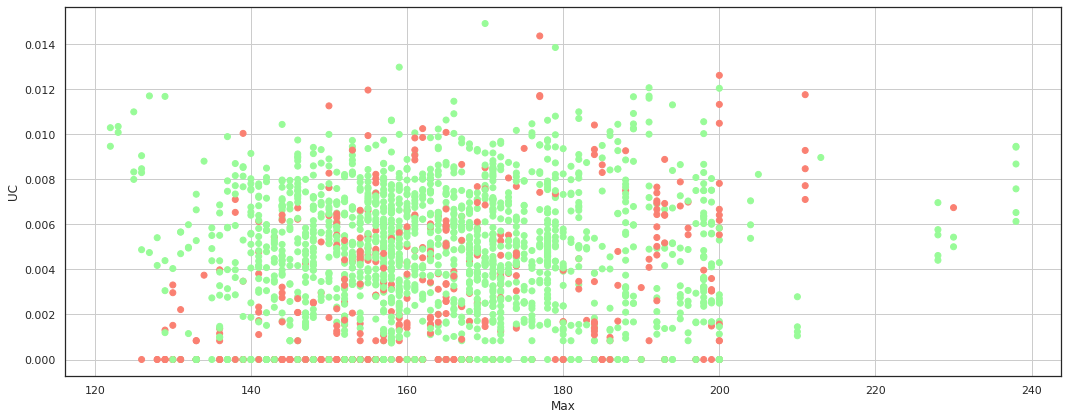

In [30]:
# Scatter plot correlated features

first = 'Max'
second = 'UC'

X= cardio_df_without_target[first].to_numpy()  
Y=cardio_df_without_target[second].to_numpy()
target=cardio_df["TARGET"].to_numpy()


fig, ax = plt.subplots(figsize= (15,6))
labels=['Normal', 'Pathologic']
colors=['palegreen','salmon']
ax.scatter(X, Y, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax.grid()
ax.set_xlabel(first)
ax.set_ylabel(second)

plt.tight_layout()
plt.show()

# Pipeline

In [31]:
# Feature selection 
feature_selection = True

# PCA
applay_pca = False
applay_pca_pi = False

# Balancing Dataset
overRand = False
overSMOTE = False
underCentr = False
overSMOOTEN = False

# Feature selection

In [32]:
#Correlation with the target
correlation = cardio_df.corr()
corr_target = abs(correlation['TARGET'])

relevant_features= corr_target[corr_target> 0]
relevant_features.sort_values(ascending=False)

TARGET      1.000000
ASTV        0.493391
ALTV        0.489400
AC          0.394988
DP          0.340895
UC          0.263823
LB          0.251875
MSTV        0.207717
MLTV        0.172519
Min         0.158171
Width       0.142182
Mode        0.092320
DS          0.090782
Variance    0.085948
FM          0.060913
Nmax        0.060354
Mean        0.059107
Max         0.048106
Median      0.047890
Nzeros      0.031163
DL          0.030166
Name: TARGET, dtype: float64

In [33]:
#Pairs with maximum correlation
c=correlation.abs().unstack()
c.sort_values(ascending=False, inplace=True)
col_above = [(col1,col2, c[col1,col2]) for col1, col2 in c.index if c[col1,col2] > 0.85 and col1 != col2]
print(col_above)

[('Median', 'Mean', 0.9482513380408178), ('Mean', 'Median', 0.9482513380408178), ('Mode', 'Median', 0.9333991564866512), ('Median', 'Mode', 0.9333991564866512), ('Width', 'Min', 0.8985189643113362), ('Min', 'Width', 0.8985189643113362), ('Mean', 'Mode', 0.8934123838327097), ('Mode', 'Mean', 0.8934123838327097)]


In [34]:
#Feature selection
if feature_selection == True:
    
  todrop = []
  for i in range(len(col_above)):
    feature1 = col_above[i][0]
    feature2 = col_above[i][1]
    if(corr_target[feature1]>=corr_target[feature2]):
      todrop.append(feature2)
    else:
      todrop.append(feature1)

  #todrop_set = set(todrop)
  todrop_set = {'Min','Median','Mode'}
  print (todrop_set)

{'Mode', 'Median', 'Min'}


In [35]:
#Dropping of the selected
cardio_df_without_target= cardio_df_without_target.drop(cardio_df_without_target[todrop_set], axis = 1)
cardio_df= cardio_df.drop(cardio_df[todrop_set], axis = 1)

# Train/test split

In [36]:
#TRAIN TEST SPLIT 
cardio_numpy_without_target=cardio_df_without_target.to_numpy() 
X_train, X_test, Y_train, Y_test = train_test_split(cardio_numpy_without_target, target, test_size=0.33, random_state=42, stratify=target)

In [37]:
cardio_df_without_target

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Max,Nmax,Nzeros,Mean,Variance
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,126,2,0,137,73
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,198,6,1,136,12
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,198,5,1,135,13
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,170,11,0,134,13
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,170,9,0,136,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,7.2,40,177,4,0,150,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,7.1,66,169,6,0,148,3
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,6.1,67,170,5,0,148,4
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,7.0,66,169,6,0,147,4


# *Standardizzazione (inside the k-fold cross val)*

In [38]:
# STANDARDIZZAZIONE
'''
sc= StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
'''

'\nsc= StandardScaler()\nsc.fit(X_train)\n\nX_train=sc.transform(X_train)\nX_test=sc.transform(X_test)\n'

# *PCA (inside the k-fold cross val)*

In [39]:
# DIMENSIONALITY REDUCTION - PCA

if applay_pca==True:

  pca = PCA(n_components=11, random_state=2020)
  X_train = pca.fit_transform(X_train)

  
  print(X_train.shape)
  var_exp=pca.explained_variance_ratio_ 
  cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

  X_test = pca.transform(X_test)

  # plot explained variances

  
  fig=plt.figure(1, figsize=(10,8))
  plt.bar(range(0,len(var_exp)), height=var_exp, alpha=0.5, align='center', color = 'mediumturquoise')
  plt.plot(range(0,len(var_exp)), cum_var_exp, marker='o',  label='cumulative explained variance',color = 'teal' )
  plt.ylabel('Explained variance ratio', fontsize= 10)
  plt.xlabel('Principal component index', fontsize=10)
  plt.xticks( range(0,len(var_exp)), range(1,(len(var_exp)+1)))
  plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
  plt.legend(loc='best')
  plt.grid()
  plt.show()


In [40]:
# Scatter interaction plot sulle due più importanti PCA (train)
'''
pca1= X_train[:,0]
pca2=X_train[:,1]

target=Y_train


fig, ax = plt.subplots(figsize= (15,6))

labels=['Normal', 'Pathologic']
pop_a = mpatches.Patch(color='steelblue', label='Normal')
pop_b = mpatches.Patch(color='crimson', label='Pathologic')
colors=['palegreen','salmon']

ax.scatter(pca1, pca2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax.grid()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


plt.tight_layout()# let's make good plots
plt.show()
'''

"\npca1= X_train[:,0]\npca2=X_train[:,1]\n\ntarget=Y_train\n\n\nfig, ax = plt.subplots(figsize= (15,6))\n\nlabels=['Normal', 'Pathologic']\npop_a = mpatches.Patch(color='steelblue', label='Normal')\npop_b = mpatches.Patch(color='crimson', label='Pathologic')\ncolors=['palegreen','salmon']\n\nax.scatter(pca1, pca2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)\nax.grid()\nax.set_xlabel('PCA1')\nax.set_ylabel('PCA2')\n\n\nplt.tight_layout()# let's make good plots\nplt.show()\n"

# *Resampling (inside the k-fold cross validation)*

In [41]:
'''
# OVERSAMPLING RANDOM

if overRand:
  oversampleRand = RandomOverSampler(sampling_strategy='minority')
  X_train, Y_train = oversampleRand.fit_resample(X_train, Y_train)

#OVERSAMPLING SMOTE
if overSMOTE:
  smote = SMOTE(random_state=42)
  X_train, Y_train = smote.fit_resample(X_train, Y_train)

#UNDERSAMPLING
elif underCentr:
  under = ClusterCentroids(random_state=42)
  X_train, Y_train = under.fit_resample(X_train, Y_train)

#SMOOTEN
elif overSMOOTEN:
  sme = SMOTEENN(sampling_strategy='minority',
                enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42)
  X_train, Y_train = sme.fit_resample(X_train, Y_train)
'''

"\n# OVERSAMPLING RANDOM\n\nif overRand:\n  oversampleRand = RandomOverSampler(sampling_strategy='minority')\n  X_train, Y_train = oversampleRand.fit_resample(X_train, Y_train)\n\n#OVERSAMPLING SMOTE\nif overSMOTE:\n  smote = SMOTE(random_state=42)\n  X_train, Y_train = smote.fit_resample(X_train, Y_train)\n\n#UNDERSAMPLING\nelif underCentr:\n  under = ClusterCentroids(random_state=42)\n  X_train, Y_train = under.fit_resample(X_train, Y_train)\n\n#SMOOTEN\nelif overSMOOTEN:\n  sme = SMOTEENN(sampling_strategy='minority',\n                enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42)\n  X_train, Y_train = sme.fit_resample(X_train, Y_train)\n"

# Classification methods

In [42]:
algoritmo = 'RandomForest'


if algoritmo == 'SVM' : 
    # Support Vector Machine (SVM) classifier
    parameter_grid = {
      'C': [100, 0.1, 1, 10, 0.001, 0.0001],
      'kernel': ['rbf', 'poly','linear'],
      'gamma': [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC()
    
elif algoritmo == 'RandomForest':
    # Random Forest classifier
    parameter_grid = {
      "criterion":["gini", "entropy"], 
      "max_features":["auto", "sqrt", "log2"],
      #"oob_score":[True],
      "n_estimators":[10, 50, 100, 200],
      "max_depth":[None,5,10,20,25]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
        
elif algoritmo == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[100, 200, 50, 30, 20, 10, 5, 3],
        "weights":['uniform','distance'],
        "p":[1,2,2000]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Choose a correct classifier.");


#new_params = {key: parameter_grid[key] for key in parameter_grid}
new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

if applay_pca_pi:
  if overRand:
      my_pipeline = make_pipeline(StandardScaler(), PCA(n_components=11, whiten = True, random_state=2020), RandomOverSampler(sampling_strategy='minority',random_state=42), classifier)
  elif overSMOTE:
      my_pipeline = make_pipeline(StandardScaler(),PCA(n_components=11, whiten = True, random_state=2020), SMOTE(random_state=42), classifier)
  elif underCentr:
      my_pipeline = make_pipeline(StandardScaler(),PCA(n_components=11,whiten = True, random_state=2020), ClusterCentroids(random_state=42), classifier)
  elif overSMOOTEN:
      my_pipeline = make_pipeline(StandardScaler(),PCA(n_components=11,whiten = True, random_state=2020), SMOTEENN(sampling_strategy='minority',enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42), classifier)        
  else :
      my_pipeline = make_pipeline(StandardScaler(),PCA(n_components=11,whiten = True, random_state=2020),classifier)

else:
  if overRand:
      my_pipeline = make_pipeline(StandardScaler(),RandomOverSampler(sampling_strategy='minority',random_state=42), classifier)
  elif overSMOTE:
      my_pipeline = make_pipeline(StandardScaler(),SMOTE(random_state=42), classifier)
  elif underCentr:
      my_pipeline = make_pipeline(StandardScaler(),ClusterCentroids(random_state=42), classifier)
  elif overSMOOTEN:
      my_pipeline = make_pipeline(StandardScaler(),SMOTEENN(sampling_strategy='minority',enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42), classifier)        
  else :
      my_pipeline = make_pipeline(StandardScaler(),classifier)

SCORE = 'f1' # 'accuracy', 'precision', 'recall', 'f1'

#accuracy = make_scorer(accuracy_score)
#precision = make_scorer(precision_score, average='weighted')
f1 = make_scorer(f1_score, pos_label = 2, average='binary')


grid = GridSearchCV(my_pipeline, param_grid=new_params, cv=kf, scoring=f1, return_train_score=True)
grid.fit(X_train, Y_train)

print(f"Best configuration found for {classifier}:")
print(grid.best_params_)
print(f"Val {SCORE}:   {grid.best_score_}")

Best configuration found for RandomForestClassifier():
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 50}
Val f1:   0.8716643339143143


# Results

In [43]:
Y_pred = grid.predict(X_test)

report = classification_report(Y_test, Y_pred, digits=3)
accuracy=accuracy_score(Y_test, Y_pred)
f1=f1_score(Y_test, Y_pred, pos_label = 2, average='binary')
precision=precision_score(Y_test, Y_pred, pos_label = 2)
recall=recall_score(Y_test, Y_pred, pos_label = 2)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print(f"")

print(report)

Accuracy:  0.9601139601139601
Precision:  0.9266666666666666
Recall:  0.8910256410256411
F1:  0.9084967320261438

              precision    recall  f1-score   support

           1      0.969     0.980     0.974       546
           2      0.927     0.891     0.908       156

    accuracy                          0.960       702
   macro avg      0.948     0.935     0.941       702
weighted avg      0.960     0.960     0.960       702



# Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


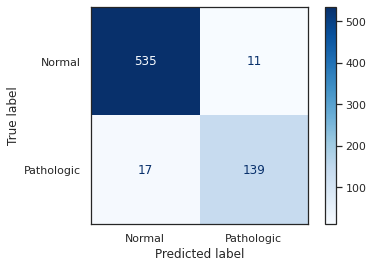

In [44]:
disp = plot_confusion_matrix(grid, X_test, Y_test,
                                 display_labels=['Normal','Pathologic'],
                                 cmap=plt.cm.Blues, 
                                 #display_labels=data.target_names, 
                                 normalize=None)

# Saving results

KNN Results

In [45]:
KNN_results = {'pipeline':['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'],
               'f1_avg':[0.89,0.88,0.87,0.86,0.88,0.87,0.87,0.85,0.87,0.85],
               'f1_pathologic':[0.82,0.82,0.8,0.79,0.82,0.81,0.8,0.78,0.8,0.78],
               'accuracy':[0.92,0.92,0.90,0.89,0.91,0.90,0.90,0.88,0.90,0.88],
               'n_neighbours':[3,10,20,20,10,10,3,3,3,10],
               'distance_type':[1,2,1,1,1,2,2,2,1,2],
               'weights':['distance','distance','distance','distance','distance','distance','distance','distance','distance','uniform']}
KNN_results_df = pd.DataFrame(KNN_results)

In [46]:
KNN_results_df

,pipeline,f1_avg,f1_pathologic,accuracy,n_neighbours,distance_type,weights
0,onlyStd,0.89,0.82,0.92,3,1,distance
1,onlyStd+PCA,0.88,0.82,0.92,10,2,distance
2,random,0.87,0.80,0.90,20,1,distance
3,random+PCA,0.86,0.79,0.89,20,1,distance
4,smote,0.88,0.82,0.91,10,1,distance
5,smote+PCA,0.87,0.81,0.90,10,2,distance
6,centroids,0.87,0.80,0.90,3,2,distance
7,centroids+PCA,0.85,0.78,0.88,3,2,distance
8,smoteenn,0.87,0.80,0.90,3,1,distance
9,smoteenn+PCA,0.85,0.78,0.88,10,2,uniform


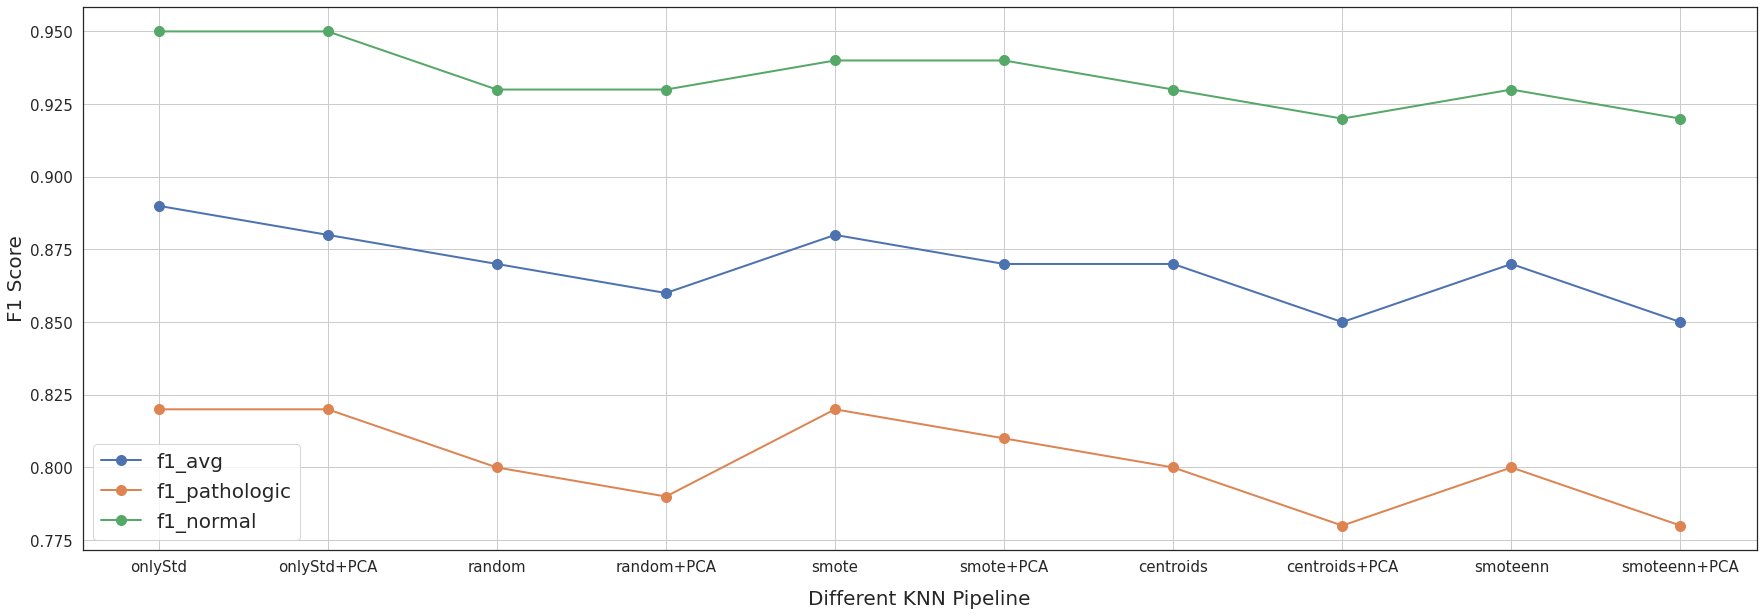

In [47]:
KNN_df = pd.DataFrame({
   'f1_avg':[0.89,0.88,0.87,0.86,0.88,0.87,0.87,0.85,0.87,0.85],
   'f1_pathologic':[0.82,0.82,0.8,0.79,0.82,0.81,0.8,0.78,0.8,0.78],
   'f1_normal':[0.95,0.95,0.93,0.93,0.94,0.94,0.93,0.92,0.93,0.92]
   }, index=['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'])
#KNN_df.plot(kind='line')


f = plt.figure(figsize=(30,10))
plt.plot(KNN_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Different KNN Pipeline",size=20,labelpad=15)
plt.ylabel("F1 Score",size=20)
plt.legend(KNN_df,prop={'size': 20})
plt.show()

KNN - New

In [48]:
KNN_results_new = {'pipeline':['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'],
               'f1_avg':[0.889,0.891,0.897,0.878,0.874,0.878,0.856,0.835,0.871,0.862],
               'f1_pathologic':[0.826,0.830,0.843,0.815,0.811,0.816,0.788,0.761,0.809,0.797],
               'f1_normal':[0.952,0.953,0.950,0.941,0.937,0.939,0.925,0.908,0.934,0.928],
               'accuracy':[0.925,0.926,0.925,0.910,0.906,0.909,0.889,0.868,0.902,0.893],
               'n_neighbours':[5,3,3,3,10,5,3,5,3,3],
               'distance_type':[1,2,1,2,1,2,1,1,1,1],
               'weights':['distance','distance','distance','distance','uniform','distance','distance','distance','distance','distance']}
KNN_results_df_new = pd.DataFrame(KNN_results_new)
KNN_results_df_new

,pipeline,f1_avg,f1_pathologic,f1_normal,accuracy,n_neighbours,distance_type,weights
0,onlyStd,0.889,0.826,0.952,0.925,5,1,distance
1,onlyStd+PCA,0.891,0.830,0.953,0.926,3,2,distance
2,random,0.897,0.843,0.950,0.925,3,1,distance
3,random+PCA,0.878,0.815,0.941,0.910,3,2,distance
4,smote,0.874,0.811,0.937,0.906,10,1,uniform
5,smote+PCA,0.878,0.816,0.939,0.909,5,2,distance
6,centroids,0.856,0.788,0.925,0.889,3,1,distance
7,centroids+PCA,0.835,0.761,0.908,0.868,5,1,distance
8,smoteenn,0.871,0.809,0.934,0.902,3,1,distance
9,smoteenn+PCA,0.862,0.797,0.928,0.893,3,1,distance


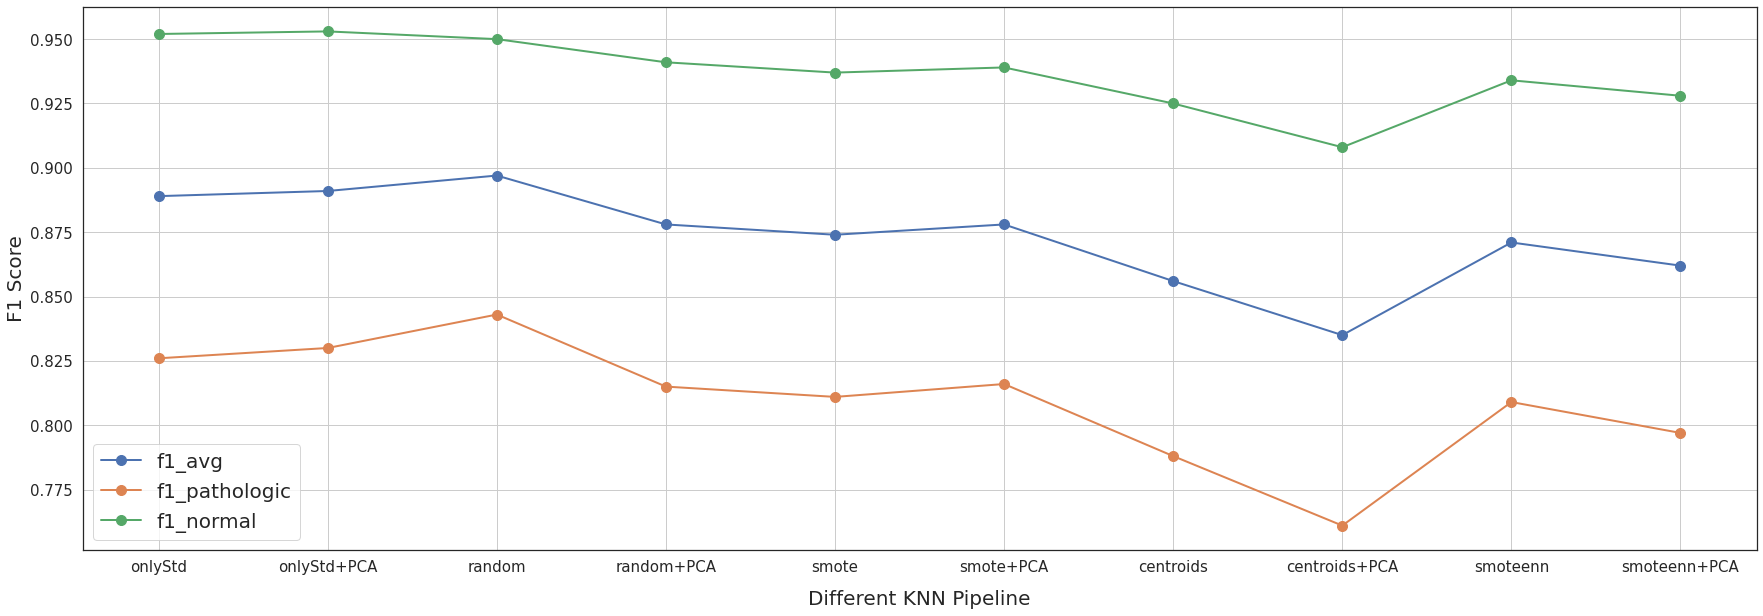

In [49]:
KNN_df_new = pd.DataFrame({
   'f1_avg':[0.889,0.891,0.897,0.878,0.874,0.878,0.856,0.835,0.871,0.862],
    'f1_pathologic':[0.826,0.830,0.843,0.815,0.811,0.816,0.788,0.761,0.809,0.797],
    'f1_normal':[0.952,0.953,0.950,0.941,0.937,0.939,0.925,0.908,0.934,0.928],
   }, index=['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'])
#KNN_df.plot(kind='line')


f = plt.figure(figsize=(30,10))
plt.plot(KNN_df_new,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Different KNN Pipeline",size=20,labelpad=15)
plt.ylabel("F1 Score",size=20)
plt.legend(KNN_df_new,prop={'size': 20})
plt.show()

KNN - Tuning K and Weights

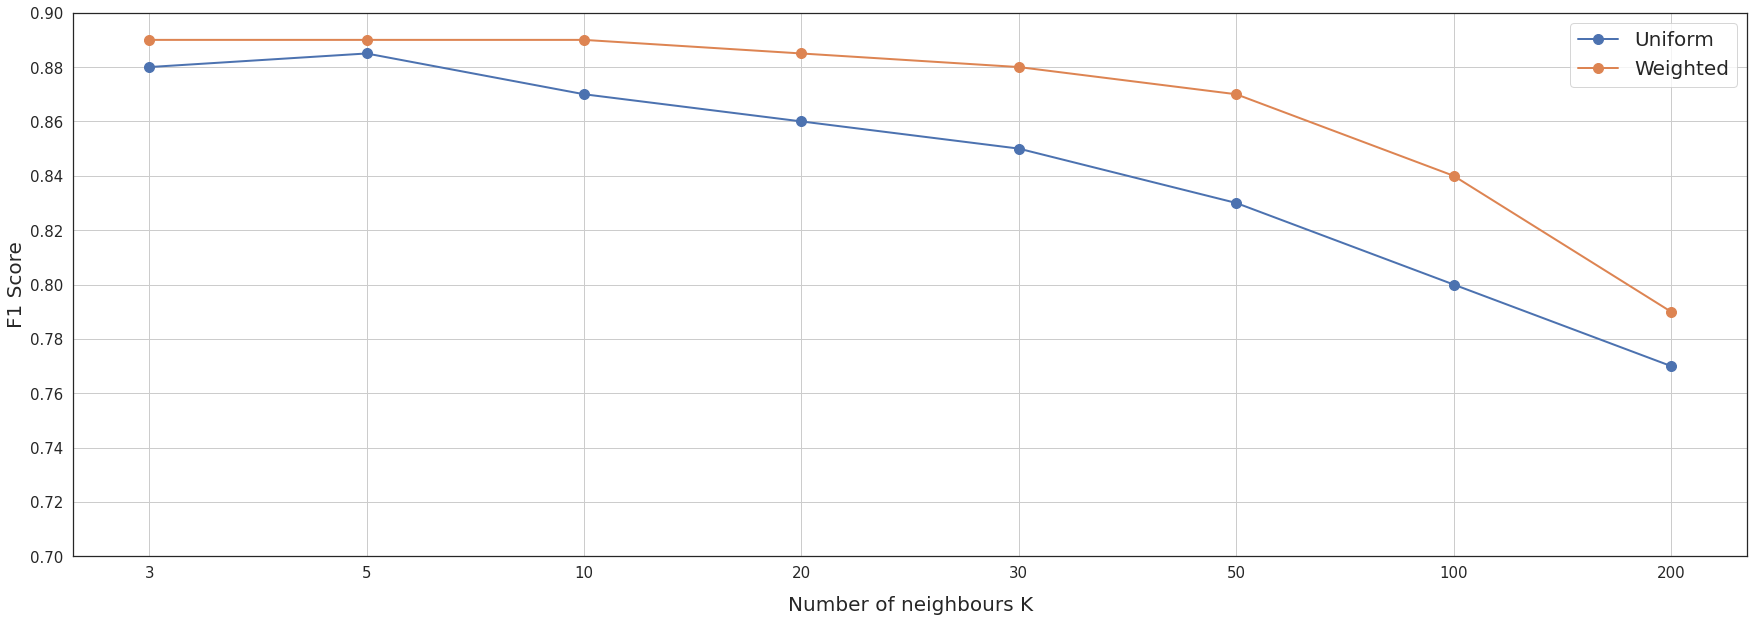

In [50]:
KNN_k = pd.DataFrame({
   'Uniform':[0.88,0.885,0.87,0.86,0.85,0.83,0.80,0.77],
   'Weighted':[0.89,0.89,0.89,0.885,0.88,0.87,0.84,0.79],
   }, index=['3','5','10','20','30','50','100','200'])
#KNN_df.plot(kind='line')


f = plt.figure(figsize=(30,10))
plt.plot(KNN_k,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(ticks=[0.70,0.72,0.74,0.76,0.78,0.80,0.82,0.84,0.86,0.88,0.90],fontsize=15)
plt.xlabel("Number of neighbours K",size=20,labelpad=15)
plt.ylabel("F1 Score",size=20)
plt.legend(KNN_k,prop={'size': 20})
plt.show()

SVM Results

In [51]:
SVM_results = {'pipeline':['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'],
               'f1_avg':[0.91,0.88,0.89,0.90,0.89,0.87,0.88,0.86,0.88,0.88],
               'f1_pathologic':[0.86,0.82,0.83,0.84,0.84,0.81,0.82,0.80,0.82,0.81],
               'f1_normal':[0.96,0.95,0.95,0.95,0.94,0.93,0.94,0.93,0.94,0.94],
               'accuracy':[0.94,0.92,0.92,0.92,0.92,0.90,0.90,0.89,0.91,0.91],
               'C':[100,100,100,100,100,100,100,100,100,100],
               'gamma':[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01],
               'kernel':['rbf','rbf','rbf','poly','rbf','rbf','rbf','rbf','rbf','poly']}
SVM_results_df = pd.DataFrame(SVM_results)

In [52]:
SVM_results_df

,pipeline,f1_avg,f1_pathologic,f1_normal,accuracy,C,gamma,kernel
0,onlyStd,0.91,0.86,0.96,0.94,100,0.01,rbf
1,onlyStd+PCA,0.88,0.82,0.95,0.92,100,0.01,rbf
2,random,0.89,0.83,0.95,0.92,100,0.01,rbf
3,random+PCA,0.90,0.84,0.95,0.92,100,0.01,poly
4,smote,0.89,0.84,0.94,0.92,100,0.01,rbf
5,smote+PCA,0.87,0.81,0.93,0.90,100,0.01,rbf
6,centroids,0.88,0.82,0.94,0.90,100,0.01,rbf
7,centroids+PCA,0.86,0.80,0.93,0.89,100,0.01,rbf
8,smoteenn,0.88,0.82,0.94,0.91,100,0.01,rbf
9,smoteenn+PCA,0.88,0.81,0.94,0.91,100,0.01,poly


SVM - Tuning C

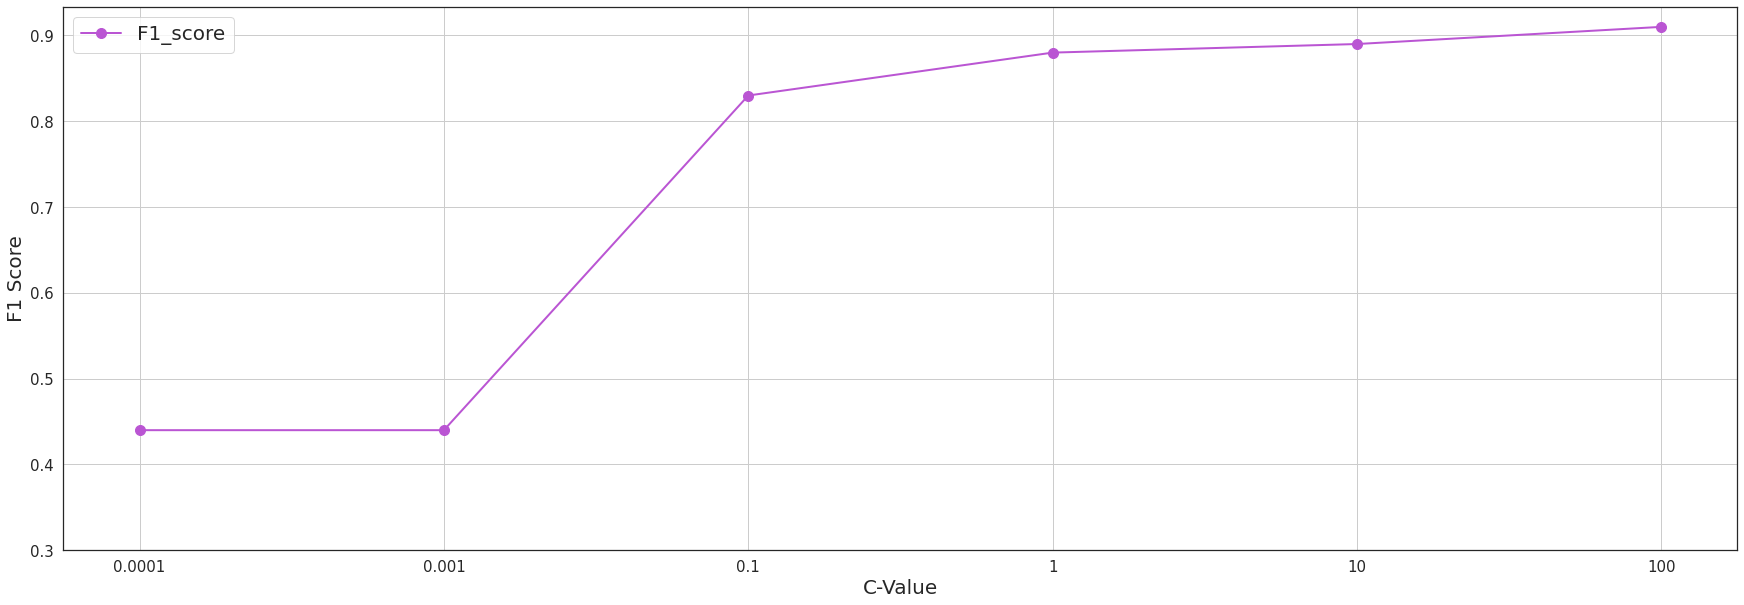

In [53]:
SVM_C = pd.DataFrame({
   'F1_score':[0.44,0.44,0.83,0.88,0.89,0.91]
   }, index=['0.0001','0.001','0.1','1','10','100'])

f = plt.figure(figsize=(30,10))
plt.plot(SVM_C,linewidth=2,marker ='o',markersize=10, color = 'mediumorchid')
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(ticks=[0.3,0.4,0.5,0.6,0.7,0.8,0.9],fontsize=15)
plt.xlabel("C-Value",size=20)
plt.ylabel("F1 Score",size=20)
plt.legend(SVM_C,prop={'size': 20})
plt.show()

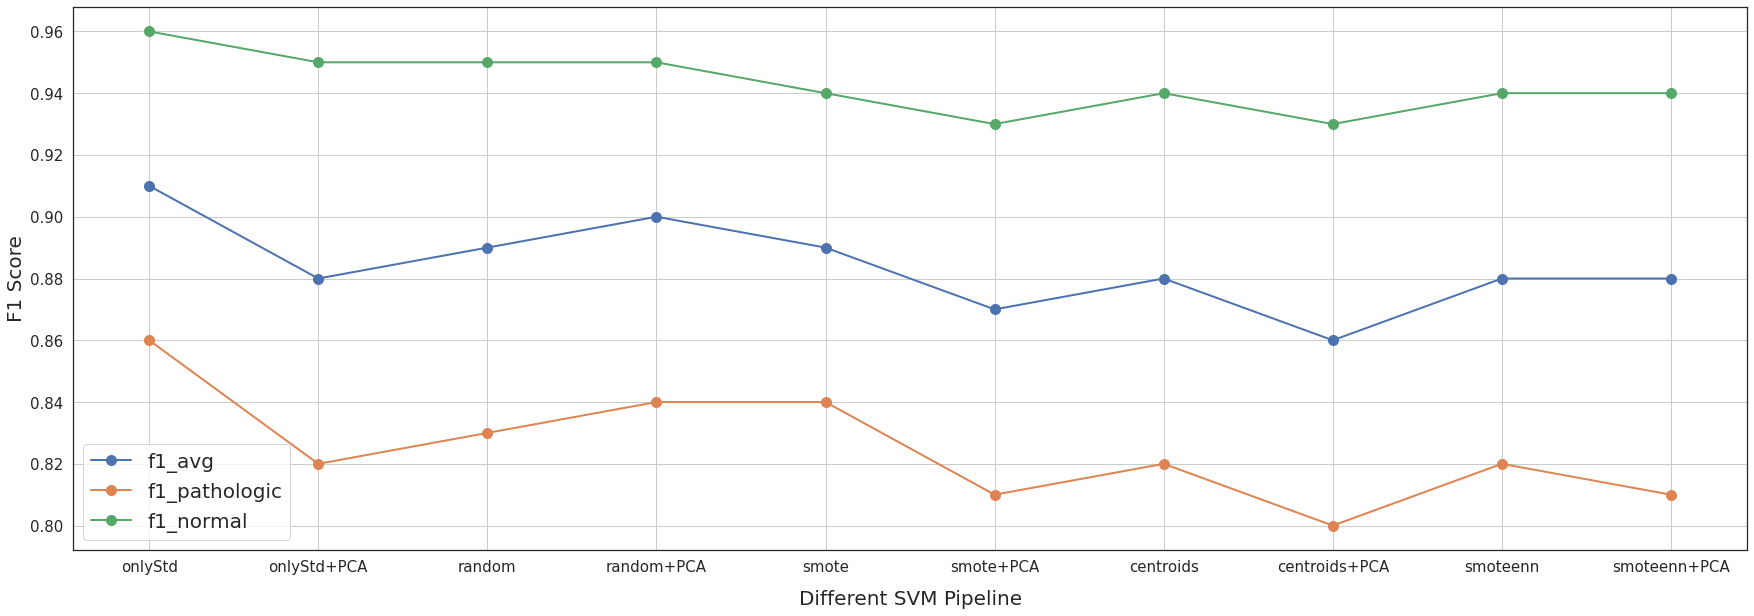

In [54]:
SVM_df = pd.DataFrame({
   'f1_avg':[0.91,0.88,0.89,0.90,0.89,0.87,0.88,0.86,0.88,0.88],
   'f1_pathologic':[0.86,0.82,0.83,0.84,0.84,0.81,0.82,0.80,0.82,0.81],
   'f1_normal':[0.96,0.95,0.95,0.95,0.94,0.93,0.94,0.93,0.94,0.94]
   }, index=['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'])


f = plt.figure(figsize=(30,10))
plt.plot(SVM_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Different SVM Pipeline",size=20,labelpad=15)
plt.ylabel("F1 Score",size=20)
plt.legend(SVM_df,prop={'size': 20})
plt.show()

RANDOM FOREST Results

In [55]:
RF_results = {'pipeline':['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'],
              'f1_avg':[0.94,0.90,0.94,0.88,0.93,0.89,0.87,0.85,0.89,0.87],
              'f1_pathologic':[0.90,0.84,0.90,0.82,0.89,0.83,0.81,0.77,0.84,0.8],
              'f1_normal':[0.97,0.96,0.97,0.95,0.97,0.95,0.93,0.92,0.95,0.93],
              'accuracy':[0.96,0.93,0.96,0.92,0.95,0.92,0.90,0.88,0.92,0.90],
              'criterion':['entropy','gini','entropy','entropy','gini','entropy','entropy','entropy','entropy','entropy'],
              'max_depth':['None','None',10,10,25,20,25,20,10,25],
              'max_features':['sqrt','log2','sqrt','log2','auto','auto','sqrt','log2','auto','log2'],
              'n_estimators':[100,50,50,100,50,100,10,100,100,200]}
RF_results_df = pd.DataFrame(RF_results)

In [56]:
RF_results_df

,pipeline,f1_avg,f1_pathologic,f1_normal,accuracy,criterion,max_depth,max_features,n_estimators
0,onlyStd,0.94,0.90,0.97,0.96,entropy,None,sqrt,100
1,onlyStd+PCA,0.90,0.84,0.96,0.93,gini,None,log2,50
2,random,0.94,0.90,0.97,0.96,entropy,10,sqrt,50
3,random+PCA,0.88,0.82,0.95,0.92,entropy,10,log2,100
4,smote,0.93,0.89,0.97,0.95,gini,25,auto,50
5,smote+PCA,0.89,0.83,0.95,0.92,entropy,20,auto,100
6,centroids,0.87,0.81,0.93,0.90,entropy,25,sqrt,10
7,centroids+PCA,0.85,0.77,0.92,0.88,entropy,20,log2,100
8,smoteenn,0.89,0.84,0.95,0.92,entropy,10,auto,100
9,smoteenn+PCA,0.87,0.80,0.93,0.90,entropy,25,log2,200


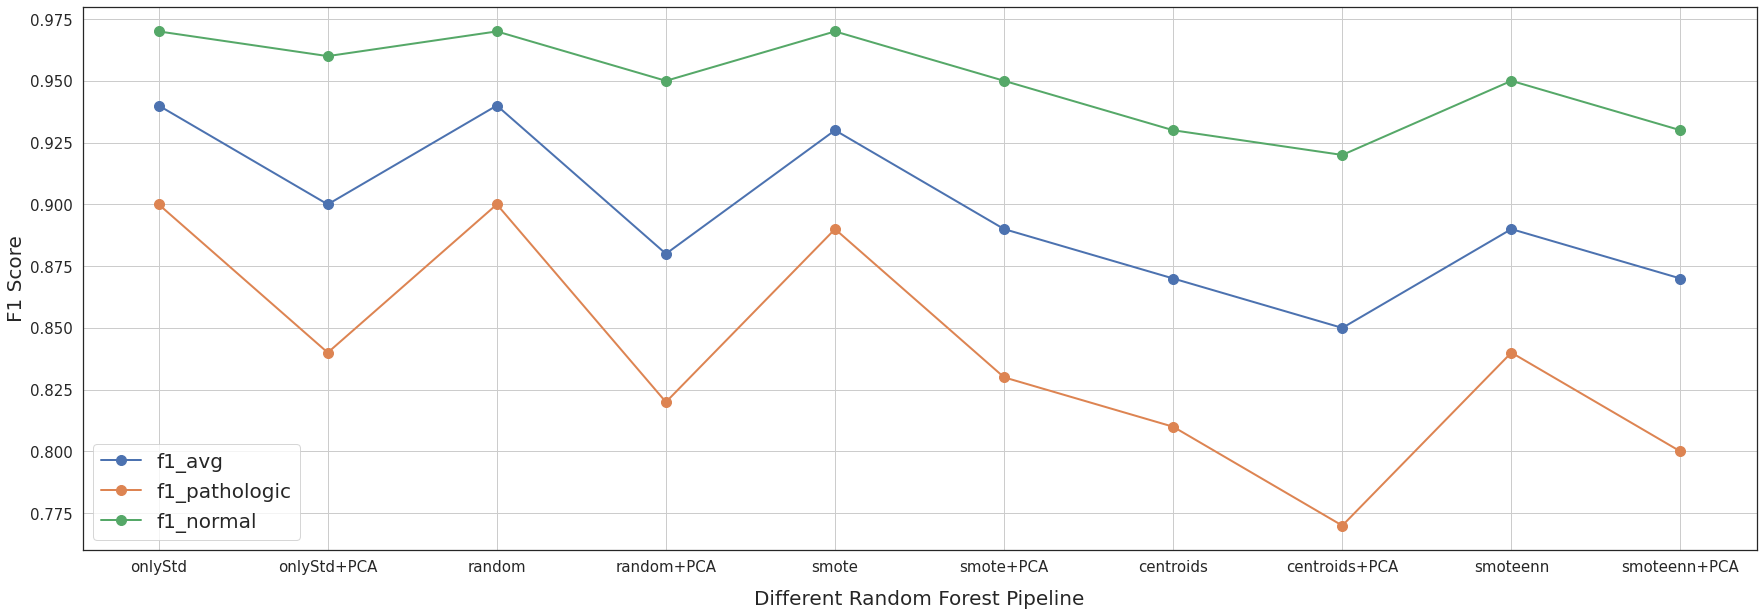

In [57]:
from itertools import cycle, islice
RF_df = pd.DataFrame({
   'f1_avg':[0.94,0.90,0.94,0.88,0.93,0.89,0.87,0.85,0.89,0.87],
   'f1_pathologic':[0.90,0.84,0.90,0.82,0.89,0.83,0.81,0.77,0.84,0.8],
   'f1_normal':[0.97,0.96,0.97,0.95,0.97,0.95,0.93,0.92,0.95,0.93]
   }, index=['onlyStd','onlyStd+PCA','random','random+PCA','smote','smote+PCA','centroids','centroids+PCA','smoteenn','smoteenn+PCA'])


f = plt.figure(figsize=(30,10))
plt.plot(RF_df,linewidth=2,marker ='o',markersize=10)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Different Random Forest Pipeline",size=20,labelpad=15)
plt.ylabel("F1 Score",size=20)
plt.legend(RF_df,prop={'size': 20})
plt.show()